In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()
print("\n IRIS FEATURES :\n",iris.feature_names)
print("\n IRIS TARGET :\n",iris.target)
print("\n IRIS TARGET NAMES:\n",iris.target_names)
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']


 IRIS FEATURES :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 IRIS TARGET :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

 IRIS TARGET NAMES:
 ['setosa' 'versicolor' 'virginica']


Text(0.5, 1.0, 'Petal')

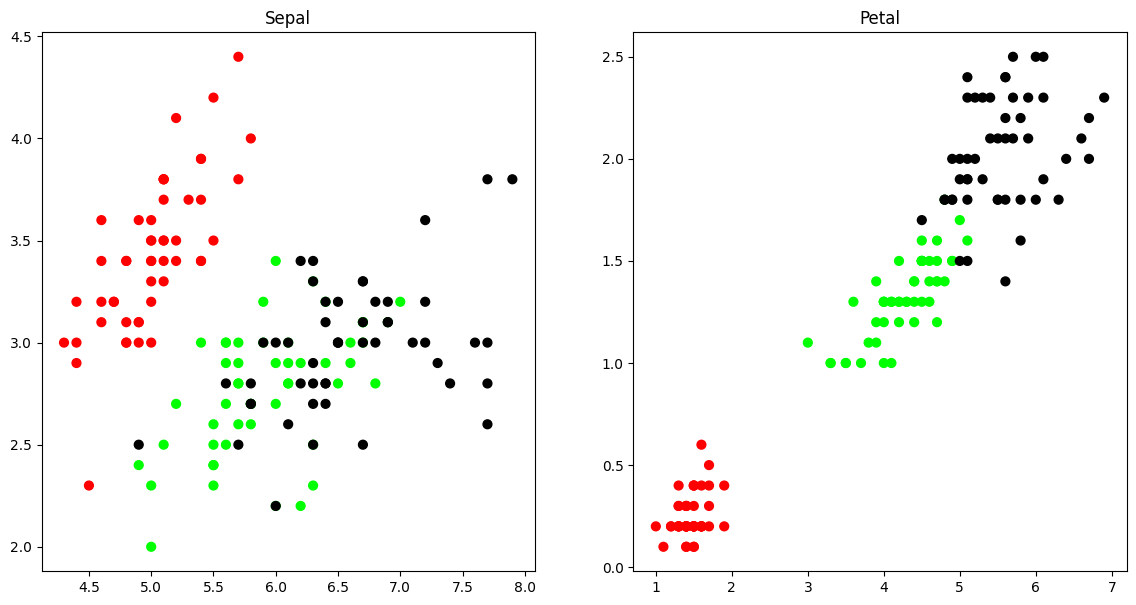

In [3]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colormap[y.Targets],s=40)
plt.title('Sepal')
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Petal')


In [5]:
model=KMeans(n_clusters=3,random_state=100)
model.fit(X)
y_pred=model.labels_
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


/home/bharath/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K Means Classification')

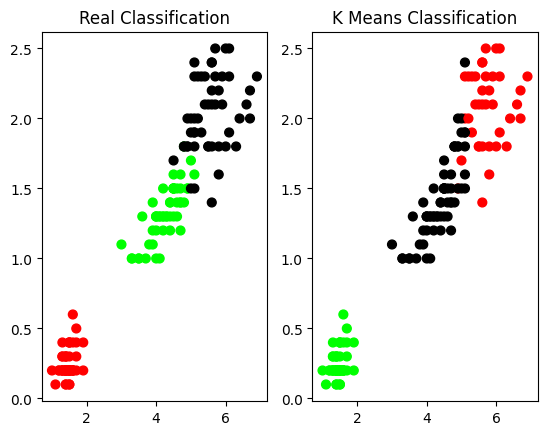

In [6]:
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_pred],s=40)
plt.title('K Means Classification')


In [7]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3,covariance_type='full',random_state=100)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'GMM Classification')

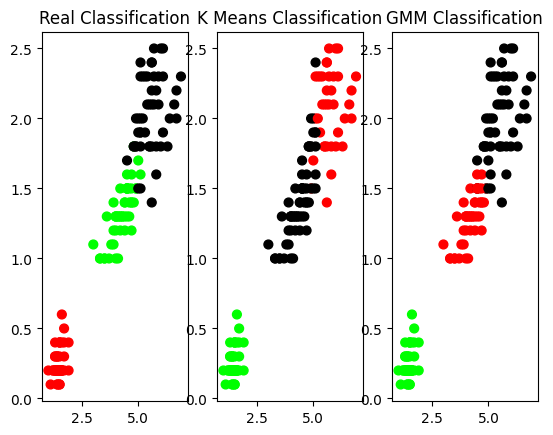

In [8]:
figsize=(16,7)
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')
plt.subplot(1,3,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_pred],s=40)
plt.title('K Means Classification')
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

In [9]:
print('K Means Accuracy')
print('Accuracy', sm.accuracy_score(y, y_pred))
print('Confusion Matrix', sm.confusion_matrix(y, y_pred))

print('GMM Accuracy')
print('Accuracy', sm.accuracy_score(y, y_cluster_gmm))
print('Confusion Matrix', sm.confusion_matrix(y, y_cluster_gmm))

K Means Accuracy
Accuracy 0.09333333333333334
Confusion Matrix [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]
GMM Accuracy
Accuracy 0.3333333333333333
Confusion Matrix [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]
